In [1]:
%load_ext autoreload
%autoreload 2

# Hexagonal Fourier analysis in 3D
from math import exp, sqrt
import numpy as np
import sympy
from sympy import Matrix

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from abelian import voronoi

import os
import sys
module_path = os.path.abspath(os.path.join('/workspaces/pose'))
if module_path not in sys.path:
    sys.path.insert(0, '/workspaces/pose')

from pose import abelian_utils, fourier_utils3

In [2]:
generators = np.array([[1, 0.5, 0], [0, sqrt(3)/2, 0], [0, 0, 1]])
n = 4
bf = abelian_utils.BumpFunction(np.array([0.375, sqrt(3)/2/n, 0.25]), 0.03, generators, n)

In [3]:
coef = abelian_utils.unshuffle(bf.func_dual.domain, bf.values_dual, n, 1)
coef_flat = abelian_utils.flatten_coefs(coef)

In [4]:
# rot_mat = fourier_utils3._rot_mat_complete((n,n,n),np.array([0,0.25,0]))
# rot_mat = fourier_utils3._rot_mat_complete((n,n,n),np.array([0.25,0,0]))
# rot_mat = fourier_utils3._rot_mat_complete((n,n,n),np.array([0,0,0.25]))
rot_mat = fourier_utils3._rot_mat_complete((n,n,n),np.array([0.25,0.25,0.25]))

In [5]:
n_coef = n*n*(n//2+1)*2
coef_flat_reduced = np.zeros(n_coef)
for idx_x in range(n):
    for idx_y in range(n):
        for idx_z in range(2*(n//2+1)):
            coef_flat_reduced[idx_x*n*2*(n//2+1)+idx_y*2*(n//2+1)+idx_z] = coef_flat[idx_x*n*2*n+idx_y*2*n+idx_z]

In [6]:
coef_flat_reduced_rotated = rot_mat.dot(coef_flat_reduced)

In [7]:
coef_flat_rotated = np.zeros(n*n*n*2)
for idx_x in range(n):
    for idx_y in range(n):
        for idx_z in range(2*(n//2+1)):
            coef_flat_rotated[idx_x*n*2*n+idx_y*2*n+idx_z] = coef_flat_reduced_rotated[idx_x*n*2*(n//2+1)+idx_y*2*(n//2+1)+idx_z]

In [8]:
coef_flat_rotated_complex = np.zeros(n*n*n, dtype=np.cdouble)
coef_flat_rotated_complex = coef_flat_rotated[0::2]
coef_flat_rotated_complex = coef_flat_rotated_complex + 1.0j*coef_flat_rotated[1::2]
coef_flat_rotated_complex_shuffled = abelian_utils.shuffle(bf.func_dual.domain, coef_flat_rotated_complex, n, 1)

In [9]:
# bf_target = abelian_utils.BumpFunction(np.array([0.5, sqrt(3)/2/n*2, 0.25]), 0.03, generators, n)
# bf_target = abelian_utils.BumpFunction(np.array([0.625, sqrt(3)/2/n, 0.25]), 0.03, generators, n)
# bf_target = abelian_utils.BumpFunction(np.array([0.375, sqrt(3)/2/n, 0.5]), 0.03, generators, n)
bf_target = abelian_utils.BumpFunction(np.array([0.75, sqrt(3)/2/n*2, 0.5]), 0.03, generators, n)

In [10]:
def plot_coefs_polar(coef1, coef2, coef3, Nx, Ny, Nz):
    for idx_z in range(Nz//2 + 1):
        print('idx_z', idx_z)
        
        plot_grid_cols = Ny
        plot_grid_rows = Nx
        fig = plt.figure(figsize=(2*plot_grid_cols, 2*plot_grid_rows))
        subfigs = fig.subfigures(plot_grid_rows, plot_grid_cols)
        subfigs = np.reshape(subfigs, (plot_grid_rows, plot_grid_cols))

        for idx_x in range(Nx):
            for idx_y in range(Ny):
                fourier_tmp1 = coef1[idx_x,idx_y,idx_z]
                fourier_tmp2 = coef2[idx_x,idx_y,idx_z]
                fourier_tmp3 = coef3[idx_x,idx_y,idx_z]

                cmplx_vals = [fourier_tmp1, fourier_tmp2, fourier_tmp3]
                ax = subfigs[idx_x,idx_y].add_subplot(1, 1, 1, projection='polar')
                for num, x in enumerate(cmplx_vals):
                    if num == 0:
                        plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')
                    if num == 1:
                        plt.polar([0,np.angle(x)],[0,abs(x)],marker='x')
                    if num == 2:
                        plt.polar([0,np.angle(x)],[0,abs(x)],marker='+',linestyle='dashed')
                
                if idx_x == 0 and idx_y == 0:
                    plt.legend(['target', 'actual', 'source'], loc='upper left')
        plt.show()

In [11]:
coef1 = abelian_utils.unshuffle(bf_target.func_dual.domain, bf_target.values_dual, n, 1).reshape((n,n,n))
coef2 = coef_flat_rotated_complex.reshape((n,n,n))
coef3 = abelian_utils.unshuffle(bf.func_dual.domain, bf.values_dual, n, 1).reshape((n,n,n))

idx_z 0


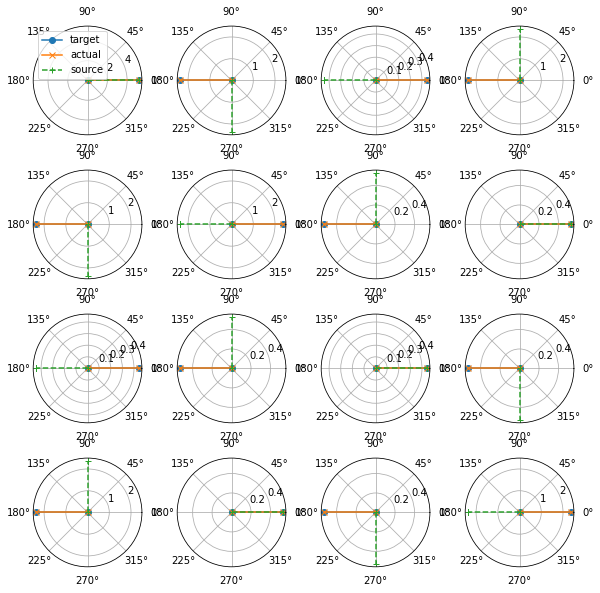

idx_z 1


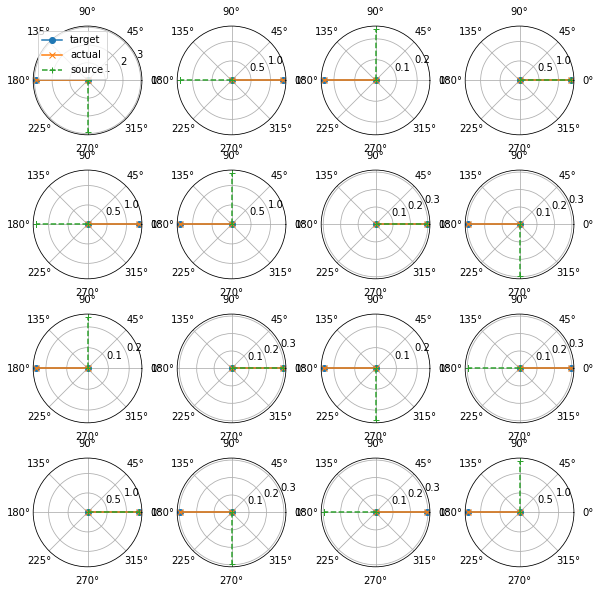

idx_z 2


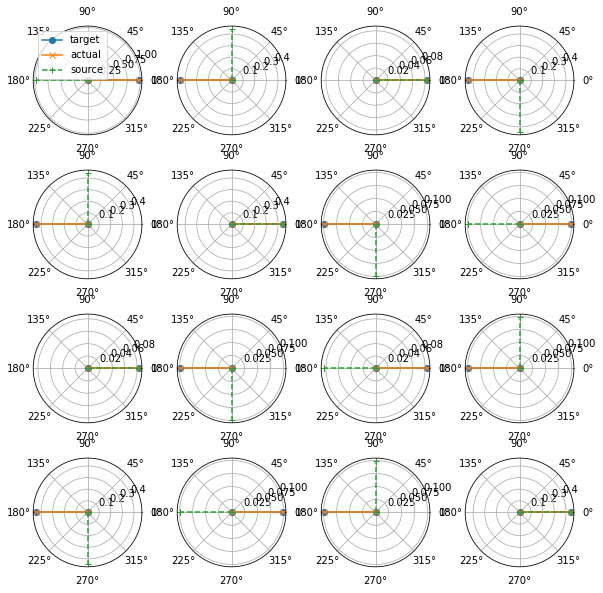

In [12]:
plot_coefs_polar(coef1, coef2, coef3, n, n, n)

In [43]:
generators = np.array([[1, 0.5, 0], [0, sqrt(3)/2, 0], [0, 0, 1]])
n = 4
fourier_coef_shape = (n, n, n)
bf2 = abelian_utils.BumpFunction(np.array([0.375, sqrt(3)/2/n, 0.25]), 0.03, generators, n)

In [44]:
coef2 = abelian_utils.unshuffle(bf2.func_dual.domain, bf2.values_dual, n, 1)

In [45]:
coef_tmp = coef2.reshape(fourier_coef_shape)

In [46]:
coef_cropped = abelian_utils.crop_conjugate_symmetry(coef_tmp, fourier_coef_shape)
coef_cropped.shape

(4, 4, 3)

In [47]:
coef_restored = abelian_utils.append_conjugate_symmetry(coef_cropped, fourier_coef_shape)

In [48]:
np.max(np.abs(coef_tmp - coef_restored))

0.0

In [49]:
coef_tmp - coef_restored

array([[[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

       [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]])